# KNN Playground
**Made this to better understand how K-Nearest Neighbours (KNN) works.**

Concepts Im Exploring:
- How KNN classifies data
- How the number of neighbours effects predictions (K)
- How adding noise changed robustness (result)
- Visualising decision boundaries and attacks

K-Nearest Neighbour is one of the simplest classification algorithms. it works by measuring the distance between a new data point and all points in the training data set. It then predicts the majority label of the closest K neighbours.

## How KNN Works
1. Store all training data.
2. When a new sample appears, calculate its distance from all training samples.
3. Pick the K closest samples.
4. Predict the majority label among them.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

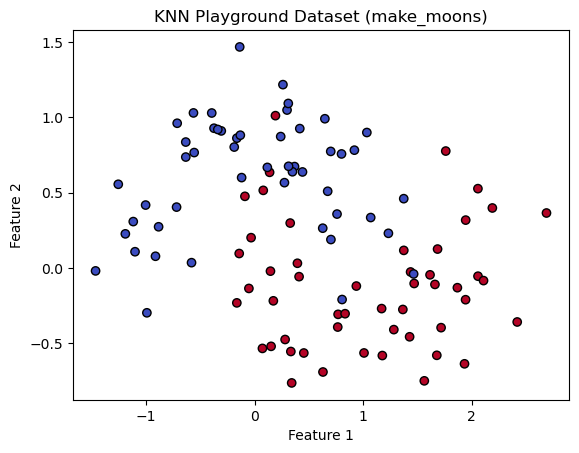

In [4]:
X, y = make_moons(noise=0.25, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("KNN Playground Dataset (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1)) # calculate distances
        k_indices = distances.argsort()[:k] # sort distances from smallest to largest
        k_labels = y_train[k_indices] # pick top K=2
        most_common = Counter(k_labels).most_common(1)[0][0] #count votes
        y_pred.append(most_common) # repeat for all test points
    return np.array(y_pred)

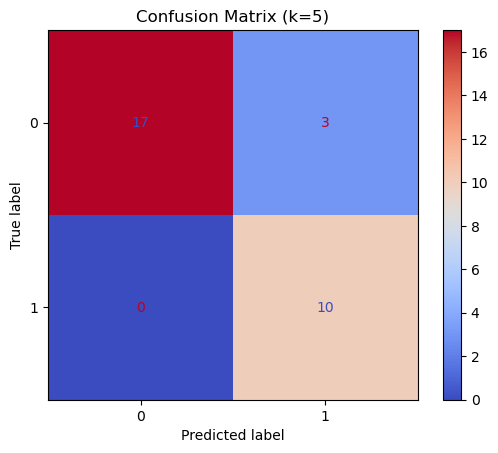

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_k = 5
y_pred = knn_predict(X_train, y_train, X_test, best_k)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='coolwarm')
plt.title(f'Confusion Matrix (k={best_k})')
plt.show()

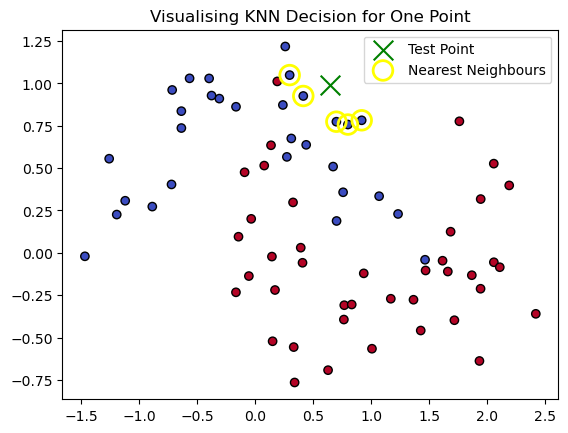

In [14]:
test_point = X_test[5]
distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
k_indices = distances.argsort()[:5]

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.scatter(test_point[0], test_point[1], c='green', marker='x', s=200, label='Test Point')
plt.scatter(X_train[k_indices,0], X_train[k_indices,1], edgecolor='yellow', linewidth=2, s=200, facecolors='none', label='Nearest Neighbours')
plt.legend()
plt.title("Visualising KNN Decision for One Point")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
test_point = X_test[0]
print(test_point)

distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
print(distances)

[-0.12032825  0.59969265]
[0.3626087  0.72588971 0.40877502 0.79791224 1.72453675 0.61782457
 1.48147305 1.3309587  0.91155299 1.55614946 0.62704378 2.71394196
 1.87476878 0.86987268 2.27374875 0.26592786 1.86638002 0.61385812
 0.51650168 0.69495949 0.53998752 1.13448277 1.62181152 0.56621111
 1.05459259 2.33103572 0.3958266  0.21661993 1.15427341 1.85198053
 1.21826244 0.12809053 0.93362937 2.31831608 0.51016373 1.27925702
 2.09074973 0.67635477 1.88862372 0.56190239 0.83408912 0.41535433
 0.53215376 1.24196163 2.11787284 1.44093189 0.73999748 2.39752062
 0.83907309 1.7382241  1.13709544 0.91982374 0.7671058  1.49394935
 0.26015358 0.43901501 2.21680932 1.27131613 1.04018047 1.70916313
 1.31419183 2.08316392 0.45168552 0.83172055 0.50523505 0.84487031
 0.63054817 2.1778306  1.91715394 1.40183641]


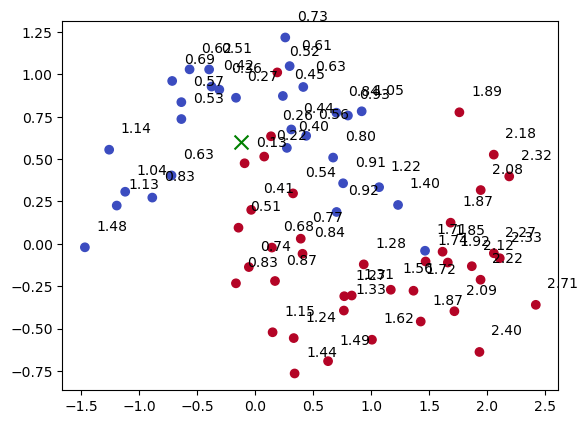

In [12]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm')
plt.scatter(test_point[0], test_point[1], c='green', marker='x', s=100)
for i, dist in enumerate(distances):
    plt.text(X_train[i,0]+0.1, X_train[i,1]+0.1, f"{dist:.2f}")
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_sklearn = model.predict(X_test)

print("My KNN accuracy:", accuracy_score(y_test, y_pred))
print("Sklearn KNN accuracy:", accuracy_score(y_test, y_sklearn))

My KNN accuracy: 0.9
Sklearn KNN accuracy: 0.9


In [17]:
perturbation = np.array([[0.2, -0.5]])  # tiny change
test_point_perturbed = test_point + perturbation

print("Original label:", knn_predict(X_train, y_train, [test_point], k=3)[0])
print("After tiny change:", knn_predict(X_train, y_train, [test_point_perturbed], k=3)[0])

Original label: 0
After tiny change: 0


In [18]:
for eps in [0.1, 0.3, 0.5, 1.0]:
    test_point_perturbed = test_point + np.array([[eps, -eps]])
    pred_original = knn_predict(X_train, y_train, [test_point], k=3)[0]
    pred_new = knn_predict(X_train, y_train, [test_point_perturbed], k=3)[0]
    print(f"ε = {eps:.1f} → Original: {pred_original}, New: {pred_new}")

ε = 0.1 → Original: 0, New: 0
ε = 0.3 → Original: 0, New: 0
ε = 0.5 → Original: 0, New: 0
ε = 1.0 → Original: 0, New: 1


In [19]:
for i in range(10):
    test_point = X_test[i]
    test_point_perturbed = test_point + np.array([[0.3, -0.2]])
    pred_original = knn_predict(X_train, y_train, [test_point], k=3)[0]
    pred_new = knn_predict(X_train, y_train, [test_point_perturbed], k=3)[0]
    print(f"Point {i}: Original {pred_original}, After change {pred_new}")

Point 0: Original 1, After change 1
Point 1: Original 0, After change 1
Point 2: Original 1, After change 1
Point 3: Original 0, After change 0
Point 4: Original 0, After change 1
Point 5: Original 0, After change 0
Point 6: Original 1, After change 0
Point 7: Original 1, After change 1
Point 8: Original 0, After change 0
Point 9: Original 1, After change 1


KNN finds closest K examples from the training set to the test point by mesuring distance. It then looks at their labels and picks the most common one as the prediction.

## Observations
- Smaller K → overfits (more jagged boundary)
- Larger K → smoother but may underfit
- Adding noise changes class boundaries
- K around 3–7 gives best accuracy for this dataset